In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import decorate, configure_plot_style, AIBM_COLORS

configure_plot_style()

In [3]:
from extract_pdf_data import extract_pdf_data

def read_pdfs():
    results = []
    for page_number in range(83, 375, 2):
        print(f"Processing page {page_number}...")
        data = extract_pdf_data(page_number, 'primary education')
        results.append(data)
    
    df = pd.DataFrame(results)
    return df



In [4]:

import os
if not os.path.exists("wef_primary_enrolment.csv"):
    df = read_pdfs()
    df.to_csv("wef_primary_enrolment.csv", index=False)

Processing page 83...
Processing page 85...
Parsing error: invalid literal for int() with base 10: ''
Line: Enrolment in primary education% - - - - - -
Parts: ['Enrolment', 'in', 'primary', 'education%', '-', '-', '-', '-', '-', '-']
Processing page 87...
Parsing error: invalid literal for int() with base 10: ''
Line: Enrolment in primary education% - - - - - -
Parts: ['Enrolment', 'in', 'primary', 'education%', '-', '-', '-', '-', '-', '-']
Processing page 89...
Parsing error: invalid literal for int() with base 10: ''
Line: Enrolment in primary education% - - - - - -
Parts: ['Enrolment', 'in', 'primary', 'education%', '-', '-', '-', '-', '-', '-']
Processing page 91...
Processing page 93...
Processing page 95...
Processing page 97...
Processing page 99...
Processing page 101...
Parsing error: invalid literal for int() with base 10: ''
Line: Enrolment in primary education% - - - - - -
Parts: ['Enrolment', 'in', 'primary', 'education%', '-', '-', '-', '-', '-', '-']
Processing page 103

In [5]:
df = pd.read_csv("wef_primary_enrolment.csv")
df.shape

(146, 7)

In [6]:
for country in df['country'].unique():
    if len(country) > 15:
        print(country)

Bosnia and Herzegovina
Brunei Darussalam
Congo, Democratic Republic of t
Dominican Republic
Moldova, Republic of
United Arab Emirates
United Republic of Tanzania
United States of America


In [7]:
df['country'] = df['country'].replace({
    'United States of America': 'United States',
    'Brunei Darussalam': 'Brunei',
    'Moldova, Republic of': 'Moldova',
    'Congo, Democratic Republic of t': 'D.R. Congo',
    'United Republic of Tanzania': 'Tanzania',
    'Viet Nam': 'Vietnam',
    'Bosnia and Herzegovina': 'Bosnia-Herzegovina',
    
})

In [8]:
df.head()

,country,page_number,score,rank,diff,left,right
0,Albania,83,0.952,115.0,-4.49,88.53,93.02
1,Algeria,85,NaN,NaN,NaN,NaN,NaN
2,Angola,87,NaN,NaN,NaN,NaN,NaN
3,Argentina,89,NaN,NaN,NaN,NaN,NaN
4,Armenia,91,0.982,108.0,-1.69,89.80,91.50


In [9]:
df.tail()

,country,page_number,score,rank,diff,left,right
141,Uzbekistan,365,0.998,83.0,-0.16,95.96,96.12
142,Vanuatu,367,1.000,1.0,0.29,91.71,91.99
143,Vietnam,369,NaN,NaN,NaN,NaN,NaN
144,Zambia,371,1.000,1.0,2.07,84.52,86.59
145,Zimbabwe,373,1.000,75.0,-0.03,86.42,86.45


The study includes 146 countries. We have primary education data for 135 of them (missing 11).

In 104/135 countries, women participate in primary education at rates equal or higher than men, so there is a 104-way tie for Rank #1.

So in 104 countries, the problem of gender equality in higher education is entirely solved, and there is no reason to allocate any further attention or resources to the problem. Yay!

In [10]:
df['rank'].value_counts(dropna=False)

rank
1.0      71
NaN      20
115.0     1
108.0     1
84.0      1
104.0     1
103.0     1
117.0     1
73.0      1
119.0     1
98.0      1
101.0     1
122.0     1
97.0      1
86.0      1
126.0     1
106.0     1
96.0      1
114.0     1
92.0      1
111.0     1
120.0     1
112.0     1
78.0      1
91.0      1
85.0      1
81.0      1
124.0     1
99.0      1
79.0      1
89.0      1
116.0     1
93.0      1
82.0      1
109.0     1
100.0     1
102.0     1
77.0      1
90.0      1
123.0     1
113.0     1
118.0     1
125.0     1
74.0      1
95.0      1
88.0      1
80.0      1
87.0      1
121.0     1
94.0      1
72.0      1
107.0     1
110.0     1
105.0     1
76.0      1
83.0      1
75.0      1
Name: count, dtype: int64

Only 31 countries received less than a perfect score in this category.

In [11]:
dinged = df['score'] < 1
dinged.sum()

np.int64(51)

Here is the distribution of their scores.

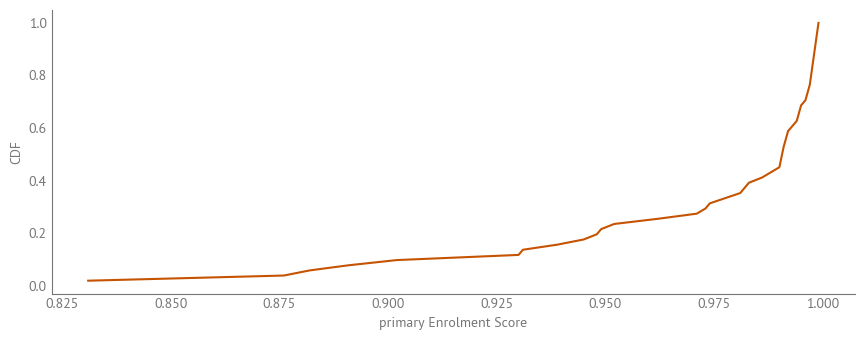

In [12]:
from empiricaldist import Cdf

cdf_score = Cdf.from_seq(df.loc[dinged, 'score'])
cdf_score.plot()
decorate(xlabel='primary Enrolment Score', ylabel='CDF')

Here is the distribution of differences (female minus male in percentage points) for all countries with valid data.

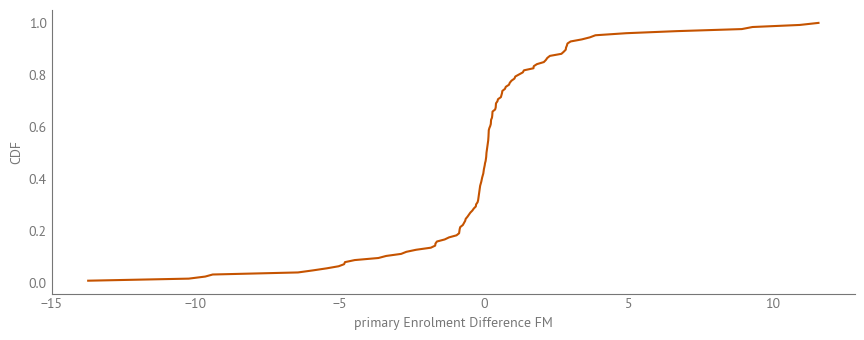

In [13]:
cdf_difference_fm = Cdf.from_seq(df['diff'])
cdf_difference_fm.plot()
decorate(xlabel='primary Enrolment Difference FM', ylabel='CDF')


In countries where women are lagging, they lag by fewer than 10 percentage points in most cases. In countries where men are lagging, the differences are much bigger, sometimes 40-60 percentage points.
So the WEF metrics are hiding the biggest differences.

Here are the countries where women lag men.

In [14]:
subset = df[dinged]
subset.sort_values("diff", ascending=False)

,country,page_number,score,rank,diff,left,right
79,Lithuania,241,0.999,77.0,-0.07,99.70,99.77
140,Uruguay,363,0.999,76.0,-0.07,99.38,99.45
59,Hungary,201,0.999,79.0,-0.10,96.09,96.19
48,Finland,179,0.999,78.0,-0.10,97.97,98.07
55,Guatemala,193,0.999,81.0,-0.14,92.24,92.38
117,Singapore,317,0.999,80.0,-0.15,99.28,99.42
141,Uzbekistan,365,0.998,83.0,-0.16,95.96,96.12
66,Italy,215,0.998,82.0,-0.17,98.32,98.49
27,Cape Verde,137,0.998,86.0,-0.18,89.04,89.22
6,Austria,95,0.998,84.0,-0.19,98.23,98.42


The data for South Korea are weird. Male enrollment is 111% and for women it's "only" 95%.
Maybe the denominator is college-age people and "college age" is shifted because of mandatory military service?

The scores are based on ratios, not differences, so let's compute those.

In [15]:
df['ratio'] = df['left'] / df['right']
df['ratio'].describe()

count    126.000000
mean       0.978829
std        0.032808
min        0.830621
25%        0.974395
50%        0.992534
75%        0.998069
max        0.999899
Name: ratio, dtype: float64

Looks like the ratio IS the score.

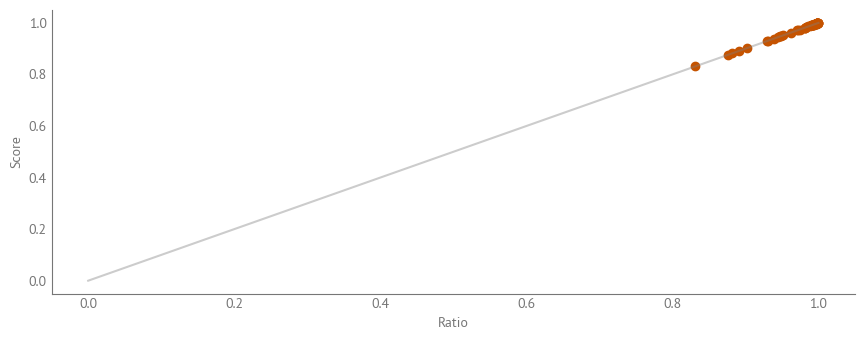

In [16]:
subset = df[dinged]
plt.plot([0, 1], [0, 1], color='gray', alpha=0.4)
plt.scatter(subset['ratio'], subset['score'])
decorate(xlabel='Ratio', ylabel='Score')


In [17]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(
    subset['ratio'], subset['score'])

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value: {r_value}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

Slope: 0.9977654711589525
Intercept: 0.00220285101715445
R-value: 0.9999740535229436
P-value: 1.1875580285133514e-106
Standard Error: 0.0010268170686197364


So here are the revised, symmetric scores.

In [18]:
df['revised_score'] = df['ratio']
df['revised_score'].describe()

count    126.000000
mean       0.978829
std        0.032808
min        0.830621
25%        0.974395
50%        0.992534
75%        0.998069
max        0.999899
Name: revised_score, dtype: float64

Here's the distribution of revised scores.

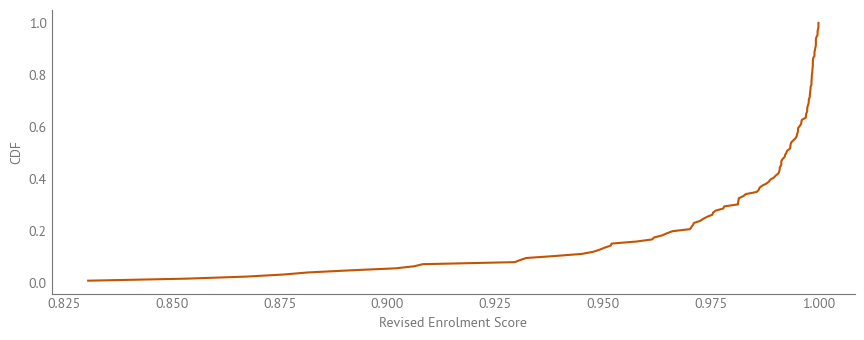

In [19]:
cdf_score = Cdf.from_seq(df['revised_score'])
cdf_score.plot()
decorate(xlabel='Revised Enrolment Score', ylabel='CDF')

In [20]:
revised = df[~dinged].dropna(subset=['ratio']).sort_values('revised_score')
revised.shape

(75, 9)

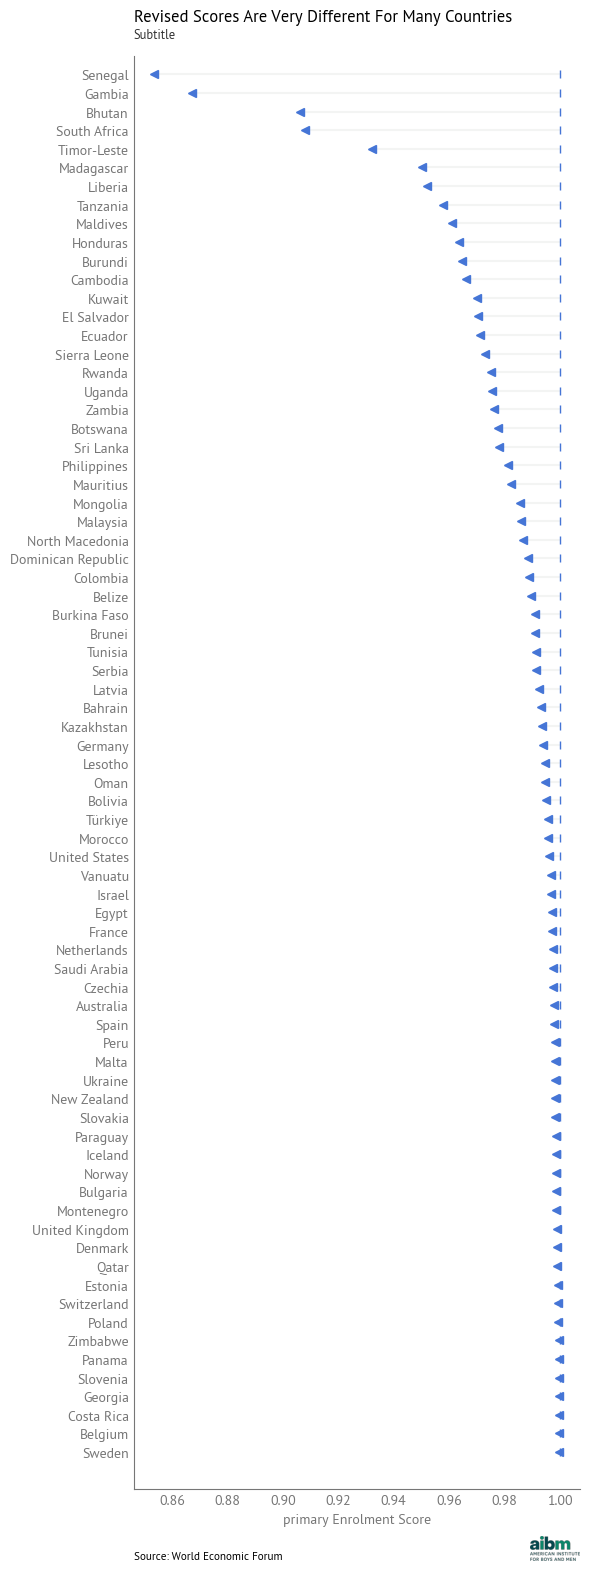

In [21]:
# make a figure that shows a horizontal line for each country that
# connects the revised score and the primary enrolment score
# with a circle for the original and a triangle for the revised

from utils import add_title, add_subtext, add_logo

fig, ax = plt.subplots(figsize=(6, 15))
plt.hlines(revised['country'], 
           revised['score'], revised['revised_score'], 
           color=AIBM_COLORS['light_gray'])
plt.plot(revised['score'], revised['country'], '|', 
         color=AIBM_COLORS['blue'])
plt.plot(revised['revised_score'], revised['country'], '<', 
         color=AIBM_COLORS['blue'])
ax.invert_yaxis()

decorate(xlabel='primary Enrolment Score', ylim=[len(revised)+1, -1])
add_title("Revised Scores Are Very Different For Many Countries",
          "Subtitle", y=1.01)
add_subtext("Source: World Economic Forum", y=-0.05)
logo = add_logo(location=(1.0, -0.05))



And here's the new ranking of countries based on revised scores.

In [22]:
columns = ['revised_rank', 'country', 'score', 'revised_score', 'diff']
df_sorted = df.dropna(subset=['ratio']).sort_values(by='revised_score', ascending=False)
df_sorted['revised_rank'] = np.arange(1, len(df_sorted)+1)
table = df_sorted[columns].round(2)
table.to_csv("wef_primary_enrolment_table.csv", index=False)

In [23]:


df_sorted[columns].head(40).round(2)

,revised_rank,country,score,revised_score,diff
126,1,Sweden,1.0,1.0,-0.01
12,2,Belgium,1.0,1.0,-0.02
34,3,Costa Rica,1.0,1.0,0.02
51,4,Georgia,1.0,1.0,0.02
119,5,Slovenia,1.0,1.0,0.03
104,6,Panama,1.0,1.0,-0.03
145,7,Zimbabwe,1.0,1.0,-0.03
108,8,Poland,1.0,1.0,0.05
127,9,Switzerland,1.0,1.0,0.07
79,10,Lithuania,1.0,1.0,-0.07


In [24]:
df_sorted[columns].tail(50).round(2)

,revised_rank,country,score,revised_score,diff
31,77,Colombia,1.00,0.99,1.05
40,78,Dominican Republic,1.00,0.99,1.08
131,79,Togo,0.99,0.99,-1.22
100,80,North Macedonia,1.00,0.99,1.21
29,81,Chile,0.99,0.99,-1.37
82,82,Malaysia,1.00,0.99,1.34
89,83,Mongolia,1.00,0.99,1.38
128,84,Tajikistan,0.98,0.98,-1.64
86,85,Mauritius,1.00,0.98,1.71
4,86,Armenia,0.98,0.98,-1.69


In [27]:
df.query("country == 'United States'")

,country,page_number,score,rank,diff,left,right,ratio,revised_score
139,United States,361,1.0,1.0,0.38,95.83,96.21,0.99605,0.99605


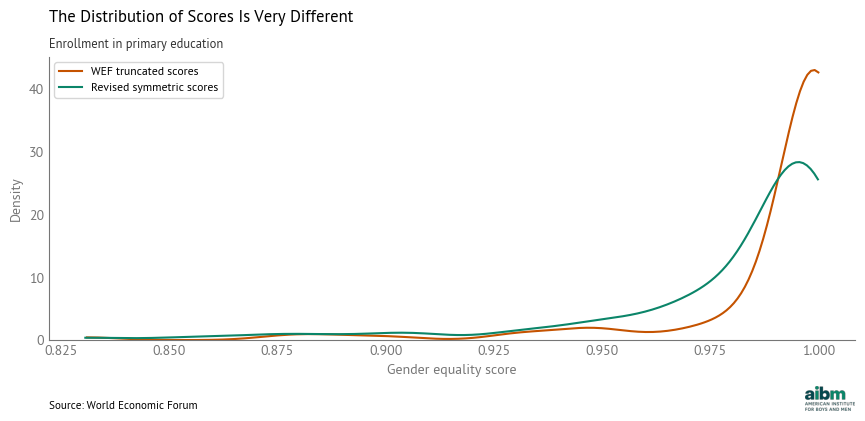

In [26]:
import seaborn as sns

options = dict(cut=0, bw_adjust=0.7)

sns.kdeplot(df['score'], label='WEF truncated scores', **options)
sns.kdeplot(df['revised_score'], label='Revised symmetric scores', **options)

decorate(xlabel='Gender equality score')

add_title("The Distribution of Scores Is Very Different",
          "Enrollment in primary education")
add_subtext("Source: World Economic Forum", y=-0.25)
logo = add_logo(location=(1.0, -0.25))
None